In [1]:
import os
import numpy as np
from PIL import Image
import pandas as pd

image_size = (28, 28)
data_dir = "dataset/"  # Cambia a la ruta donde tienes las carpetas de dígitos

X = []
y = []

for label in os.listdir(data_dir):
    label_path = os.path.join(data_dir, label)
    if not os.path.isdir(label_path):
        continue
    
    for filename in os.listdir(label_path):
        if filename.endswith(".png") or filename.endswith(".jpg"):
            img_path = os.path.join(label_path, filename)
            img = Image.open(img_path).convert("L")
            img = img.resize(image_size)
            img_array = np.array(img).flatten()
            X.append(img_array)
            y.append(int(label))

X = np.array(X, dtype=np.uint8)
y = np.array(y, dtype=np.uint8)

# Guardar CSV optimizado
df = pd.DataFrame(X)
df["label"] = y
df.to_csv("datos_imagenes.csv", index=False)
print(f"Datos procesados y guardados. Total imágenes: {len(X)}")


Datos procesados y guardados. Total imágenes: 21555


In [2]:
import pandas as pd

df = pd.read_csv("datos_imagenes.csv", dtype="uint8")
X = df.drop("label", axis=1).values
y = df["label"].values
print(f"Datos cargados desde CSV. Total imágenes: {len(X)}")


Datos cargados desde CSV. Total imágenes: 21555


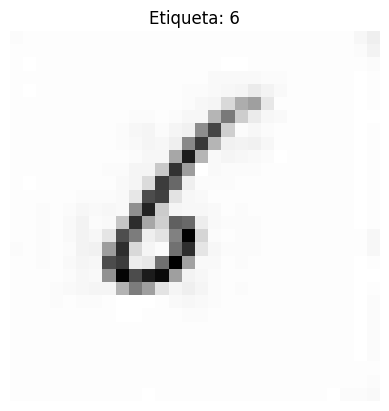

In [3]:
import matplotlib.pyplot as plt
import random

idx = random.randint(0, len(X)-1)
image = X[idx].reshape(28, 28)
label = y[idx]

plt.imshow(image, cmap="gray")
plt.title(f"Etiqueta: {label}")
plt.axis("off")
plt.show()


In [4]:
from sklearn.model_selection import train_test_split

# División 60% entrenamiento, 20% validación, 20% prueba, estratificada
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42
)

print(f"Entrenamiento: {len(X_train)} muestras")
print(f"Validación: {len(X_val)} muestras")
print(f"Prueba: {len(X_test)} muestras")


Entrenamiento: 12933 muestras
Validación: 4311 muestras
Prueba: 4311 muestras


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Ampliar la búsqueda de hiperparámetros
param_grid = {
    "max_depth": [10, 15, 20, 25, 30, None],  # Añadir más valores, incluyendo sin límite (None)
    "min_samples_split": [2, 5, 10, 20, 50],  # Más valores para probar
    "min_samples_leaf": [1, 5, 10, 20],  # Más valores para probar
    "criterion": ["gini", "entropy"],  # Los dos criterios clásicos para la división
    "max_features": [None, "sqrt", "log2", 0.5, 0.75]  # Prueba con una fracción de las características
}

# Crear el clasificador de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)

# Configurar GridSearchCV para buscar los mejores hiperparámetros
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", n_jobs=-1, verbose=2)

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros encontrados:", grid_search.best_params_)
print(f"Mejor precisión en validación cruzada: {grid_search.best_score_:.4f}")


Fitting 3 folds for each of 1200 candidates, totalling 3600 fits
Mejores parámetros encontrados: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Mejor precisión en validación cruzada: 0.4529


In [14]:
from sklearn.metrics import accuracy_score, classification_report

best_model = grid_search.best_estimator_

# Evaluar en validación
y_val_pred = best_model.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)
print(f"Precisión en validación: {val_acc:.4f}")
print("Reporte clasificación validación:")
print(classification_report(y_val, y_val_pred))

# Evaluar en prueba
y_test_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Precisión en prueba: {test_acc:.4f}")
print("Reporte clasificación prueba:")
print(classification_report(y_test, y_test_pred))


Precisión en validación: 0.4737
Reporte clasificación validación:
              precision    recall  f1-score   support

           0       0.63      0.68      0.65       447
           1       0.57      0.69      0.62       448
           2       0.45      0.46      0.46       447
           3       0.44      0.47      0.45       440
           4       0.43      0.44      0.43       436
           5       0.39      0.38      0.39       425
           6       0.49      0.49      0.49       424
           7       0.48      0.45      0.47       423
           8       0.37      0.32      0.34       417
           9       0.40      0.33      0.36       404

    accuracy                           0.47      4311
   macro avg       0.47      0.47      0.47      4311
weighted avg       0.47      0.47      0.47      4311

Precisión en prueba: 0.4806
Reporte clasificación prueba:
              precision    recall  f1-score   support

           0       0.57      0.62      0.59       447
        

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def mostrar_imagen(img_array, titulo):
    plt.imshow(img_array.reshape(28, 28), cmap='gray')
    plt.title(titulo)
    plt.axis('off')
    plt.show()

# Predicciones en conjunto prueba
y_pred_test = best_model.predict(X_test)

# Índices de aciertos y errores
indices_correctos = np.where(y_pred_test == y_test)[0]
indices_incorrectos = np.where(y_pred_test != y_test)[0]

# Imagen correcta aleatoria
idx_correcto = np.random.choice(indices_correctos)
mostrar_imagen(X_test[idx_correcto], f"Correcto - Etiqueta real: {y_test[idx_correcto]}")

# Imagen incorrecta aleatoria
idx_incorrecto = np.random.choice(indices_incorrectos)
mostrar_imagen(
    X_test[idx_incorrecto],
    f"Incorrecto - Real: {y_test[idx_incorrecto]}, Predicho: {y_pred_test[idx_incorrecto]}"
)

# Imagen personalizada (cambiar ruta)
ruta_imagen_personal = "numero2.png"

try:
    img_personal = Image.open(ruta_imagen_personal).convert('L')
    img_personal = img_personal.resize((28, 28))
    img_personal_array = np.array(img_personal).flatten().reshape(1, -1)
    prediccion_personal = best_model.predict(img_personal_array)[0]
    mostrar_imagen(img_personal_array, f"Imagen personalizada - Predicción: {prediccion_personal}")
except FileNotFoundError:
    print(f"No se encontró la imagen personalizada en la ruta: {ruta_imagen_personal}")


NameError: name 'best_model' is not defined